In [1]:
#########################################
# Test functions and non-permanent code #
# Author: Jarrett Reimers               #

# Keep as a reference, do not edit      #
#########################################

import pandas as pd
import numpy as np
import os
import datetime

import query
from model import Model
import parameter
import plotly.express as px

import plotly.graph_objects as go

import matplotlib.pyplot as plt

from matplotlib import pyplot
import seaborn as sns

if not os.path.exists("images"):
    os.mkdir("images")

In [2]:
data = pd.read_csv("data/2023/by_station/Cooper Square & Astor Pl.csv", low_memory=False)

In [3]:
start_times = []
for start_time in data['started_at']:
  start_times.append(datetime.datetime.strptime(start_time, "%Y-%m-%d %H:%M:%S"))
data['started_at'] = start_times
stop_times = []
for stop_time in data['ended_at']:
  stop_times.append(datetime.datetime.strptime(stop_time, "%Y-%m-%d %H:%M:%S"))
data['ended_at'] = stop_times

In [15]:
station_list = query.get_stations(data)
station_id = 324 
station_data = query.select_start_station(data, station_id)
stations = Model()
start_time = query.get_datetime(2015, 5, 1, 0, 0, 0)

freq = []
for day in range(0, 60):
  stations.clear_data()
  window = datetime.timedelta(days=1)
  end_time = start_time + window
  window_data = query.select_time(station_data, start_time, end_time)
  stations.add_data(window_data)

  # print("Total trips started on day", day)
  # if station_id in stations.stations_count:
  #   print(stations.stations_count[station_id])
  # else:
  #   print(0)
  
  daily = []
  for hour in range(0, 24):
    stations.clear_data()
    window = datetime.timedelta(hours=1)
    end_time = start_time + window
    window_data = query.select_time(station_data, start_time, end_time)
    stations.add_data(window_data)

    if station_id in stations.stations_count:
      # print(hour, stations.stations_count[station_id])
      daily.append(stations.stations_count[station_id])
    else:
      # print(hour, 0)
      daily.append(0)
      
    start_time = end_time
  freq.append(daily)
  start_time = end_time


KeyError: 'start station id'

In [174]:
start_time = query.get_datetime(2023, 4, 1, 0, 0, 0)
end_time = query.get_datetime(2023, 7, 1, 0, 0, 0)
interval = 0.5

freqs = []
while start_time < end_time:
    freq = []
    if start_time.weekday() > 5:
        start_time += datetime.timedelta(days=1)
        continue
    daily_rides = len(query.select_time(data, start_time, start_time+datetime.timedelta(days=1)))
    if daily_rides < 150 or daily_rides > 250:
        start_time += datetime.timedelta(days=1)
        continue   
    for hour in range(int(24/interval)):
        stop_time = start_time + datetime.timedelta(hours=interval)
        rides = len(query.select_time(data, start_time, stop_time))
        freq.append(rides)
        start_time = stop_time
    freqs.append(freq)

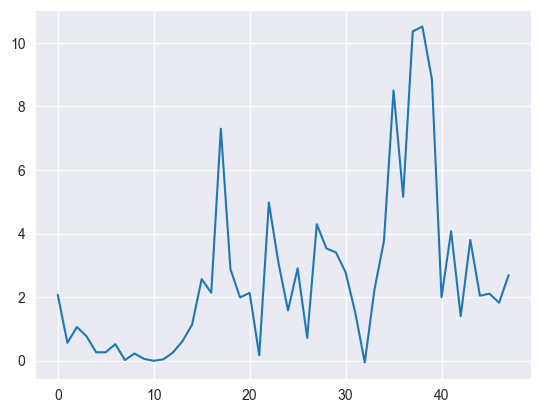

In [179]:
df = pd.DataFrame(freqs)
# p = 0.73
plt.plot(df.var() - df.mean())

In [176]:
p = 0.73295
(df.var() - df.mean()/p).sum()

49.351925438297286

(array([ 4.,  6., 11.,  9.,  8.,  5.,  5.,  8.,  3.,  1.,  0.,  1.,  2.,
         0.,  1.]),
 array([ 1.        ,  1.93333333,  2.86666667,  3.8       ,  4.73333333,
         5.66666667,  6.6       ,  7.53333333,  8.46666667,  9.4       ,
        10.33333333, 11.26666667, 12.2       , 13.13333333, 14.06666667,
        15.        ]),
 <BarContainer object of 15 artists>)

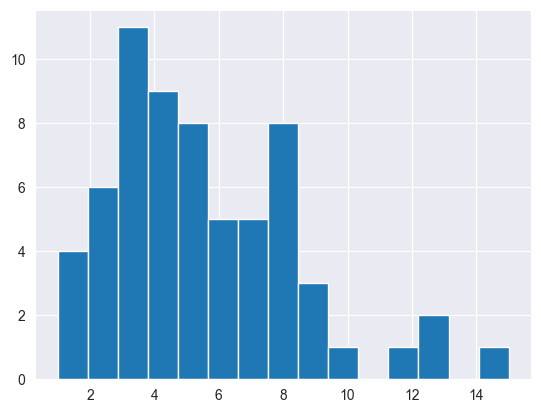

In [177]:
col = 27
plt.hist(df[col].T, bins=df[col].T.max())

(array([2., 0., 2., 2., 0., 1., 1., 3., 1., 2., 2., 2., 0., 3., 2., 2., 2.,
        4., 6., 2., 5., 0., 4., 0., 5., 3., 1., 3., 1., 3.]),
 array([152.        , 155.26666667, 158.53333333, 161.8       ,
        165.06666667, 168.33333333, 171.6       , 174.86666667,
        178.13333333, 181.4       , 184.66666667, 187.93333333,
        191.2       , 194.46666667, 197.73333333, 201.        ,
        204.26666667, 207.53333333, 210.8       , 214.06666667,
        217.33333333, 220.6       , 223.86666667, 227.13333333,
        230.4       , 233.66666667, 236.93333333, 240.2       ,
        243.46666667, 246.73333333, 250.        ]),
 <BarContainer object of 30 artists>)

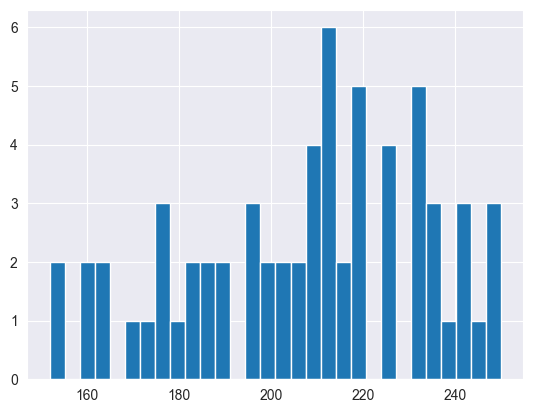

In [178]:
plt.hist(df.T.sum(), bins=30)

In [163]:
for q in df.quantile(0.1):
    trimmed_df = df.loc[df[col] > q]

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
1.0
1.0
2.0
1.0
0.0
1.0
1.0
1.7000000000000002
2.0
2.0
2.0
2.0
2.0
2.0
3.0
3.0
4.7
4.0
5.0
4.7
7.7
5.0
3.0
3.0
3.0
1.0
2.0
2.0
1.0
1.0
1.0
0.7000000000000002


In [8]:
# stations = Stations()
# stations.add_data(query.select_time(data, start_time, end_time))
#   
# pyplot.plot(range(len(stations.stations_count)), stations.stations_count.values())

In [7]:
maximum = 0
max_station = 0
for station in stations.stations_count:
  if stations.stations_count[station] > maximum:
    max_station = station
    maximum = stations.stations_count[station]
print("The maximum is at station:", max_station, ". With", maximum, "bikes at end of period")

The maximum is at station: 0 . With 0 bikes at end of period


In [17]:
minimum = 0
min_station = 0
for station in stations.stations_count:
  if stations.stations_count[station] < minimum:
    min_station = station
    minimum = stations.stations_count[station]
print("The minimum is at station:", min_station, ". With", minimum, "bikes at end of period")

The minimum is at station: 496 . With -69 bikes at end of period


In [39]:
windows = [0.25, 0.5, 1]

start_time = query.get_datetime(2015, 5, 1, 0, 0, 0)
stop_time = query.get_datetime(2015, 5, 31, 0, 0, 0)
weekdays_and_ends = parameter.get_weekdays(start_time, stop_time)
weekdays = weekdays_and_ends[0]
weekends = weekdays_and_ends[1]
stations = (data['start station id']).unique()

daily_trips = []
for start_time in weekdays:
  end_time = start_time + datetime.timedelta(days=1)
  daily_trips.append(len(query.select_time(data, start_time, end_time)))
  start_time += datetime.timedelta(days=1)
# throughput = pd.cut(daily_trips, 3, labels=range(3))

for hours in windows:
  # for station_id in stations[:5]:
    weekday_freqs = [] 
    station_id = 537
    station_df = query.select_start_station(data, station_id)
    
    for start_time in weekdays:
      freq = []
      stop_time = start_time+datetime.timedelta(days=1)
      time_df = query.select_time(station_df, start_time, stop_time).reset_index(drop=True)
      chop_df = parameter.cut(time_df, start_time, stop_time, datetime.timedelta(hours=hours))
      for i in range(len(chop_df)):
        freq.append(len(chop_df[i]))
      weekday_freqs.append(freq)
    
    rows = []
    i = 0
    for daily in weekday_freqs:
      hour = 0
      for hourly in daily:
        rows.append([hourly, hour, daily_trips[i]])
        hour += 1
      i+=1 
    df = pd.DataFrame(rows, columns=['trips', 'hours', 'Total throughput'])
    
    trip_data = pd.DataFrame(weekday_freqs)
    rate = trip_data.sum()/len(trip_data.T.iloc[0])
    pred = np.random.poisson(rate)
    
    fig = px.scatter(df, x='hours', y='trips', color='Total throughput', template='plotly',
                     width=1200, height=500, labels={'hours': 'Half-hours', 'trips': 'Departures', 'Total throughput': 'Total throughput'}, title="Daily departure breakdown (May, weekday only)")
    fig.add_trace(go.Scatter(x=np.array(range(int(24/hours))), y=np.array(pred),
                        mode='lines',
                        name=''))
    
    if not os.path.exists(f"images/{station_id}/"):
      os.mkdir(f"images/{station_id}/")
    fig.write_image(f'images/{station_id}/{hours}_test.png')

In [10]:
station_data = query.select_start_station(data, 537)
start_time = query.get_datetime(2015, 5, 1, 0, 0, 0)
end_time = query.get_datetime(2015, 5, 31, 0, 0, 0)

slide_data = []
while start_time <= end_time:
    stop_time = start_time+datetime.timedelta(days=1)
    time_df = query.select_time(station_data, start_time, stop_time).reset_index(drop=True)
    slide_data.append(len(time_df))
    start_time = stop_time
    

In [28]:
start_time = query.get_datetime(2015, 5, 1, 0, 0, 0)
end_time = query.get_datetime(2015, 5, 31, 0, 0, 0)
weekdays_and_ends = parameter.get_weekdays(start_time, end_time)
weekdays = weekdays_and_ends[0]
slide_freqs = [] 

for start_time in weekdays:
    freq = []
    stop_time = start_time+datetime.timedelta(days=1)
    time_df = query.select_time(station_data, start_time, stop_time).reset_index(drop=True)
    chop_df = parameter.cut(time_df, start_time, stop_time, datetime.timedelta(hours=0.5))
    for i in range(len(chop_df)):
      freq.append(len(chop_df[i]))
    slide_freqs.append(freq)
slide_freqs = pd.DataFrame(slide_freqs)

In [30]:
px.bar(slide_data, template="plotly", labels={
                     "index": "Days",
                     "value": "Outgoing trips",
                 },
                title="Lexington Ave & E 24 St - Daily number of departures")